<a href="https://colab.research.google.com/github/badlabs-sd/Project-6-NIDDK/blob/main/Health_Care_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Context**

NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.

**Problem Statement:**</br>
Build a model to accurately predict whether the patients in the dataset have diabetes or not?

#### **Dataset Description:**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0


In [ ]:
# installing the python package
! pip install imbalanced-learn
! pip3 install xgboost
! pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 5.3 MB/s 
     |████████████████████████████████| 1.1 MB 36.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=a7dea48936a03067e9ec0e387805b30d58e833b228838d83c6b097561f53fdd1
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=26cb43f81a6ea03e04b96287113d3552890c246ddec9637a5674b97ffa1961ac
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [ ]:
# Import the Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import Data
df = pd.read_csv("/content/drive/MyDrive/SimpliLearn-Capstone/HealthCare/Healthcare - Diabetes/health care diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Exploring the volume of teh dataset 
rows,colums = df.shape
print(f"The dataset contains {rows} datapoints and {colums} features which includes the traget variable")

The dataset contains 768 datapoints and 9 features which includes the traget variable


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### **Data Wrangling**

#### **1. Exploring and Handling the Missing Value.**
Can minimum value of below listed columns be zero (0)? On these columns, a value of zero does not make sense and thus indicates missing value.
  - Glucose
  - BloodPressure
  - SkinThickness
  - Insulin
  - BMI


Insulin          48.697917
SkinThickness    29.557292
BloodPressure     4.557292
BMI               1.432292
Glucose           0.651042
dtype: float64


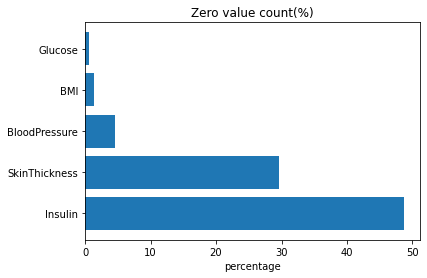

In [ ]:
# Exploring and handling the Zero value count in the dataset  for the follwoing features :Glucose,BloodPressure,SkinThickness,Insulin ,BMI

# Replacing the Zero value with NaN
zero_value_count = df[df[["Glucose","BloodPressure" ,"SkinThickness", "Insulin","BMI"]]==0].count()/df.shape[0]*100
zero_value_count=zero_value_count.sort_values(ascending=False).head(5)
print(zero_value_count)
plt.barh(y=zero_value_count.index,width=zero_value_count.values)
plt.title("Zero value count(%)")
plt.xlabel("percentage")
plt.show()

**Note**<br/>
Based on the above chart,`insulin` feature hold 48.69% zero/missing values followed by `skin Thickness` feature where the value is 29.55%, `Blood pressure`  with 4.5%, `BMI` with 1.43% and `Glucose` with .65%.
Therefore for `insulin` and `skin Thckness`, multvariant imputation are adoped as the zero/missing value is over 25% of the entire dataset and for the remaining features where the value is below 5%,univariant impuation technique is adopted.

**Univariant Imputation of the missing value for the features[`Glucose`, `BMI` and `Blood pressure`] where the count is below 5%**

In [ ]:
#Exploring the distribution of the features
df[["Glucose","BloodPressure" ,"BMI"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,120.894531,31.972618,0.0,99.0,117.0,140.25,199.0
BloodPressure,768.0,69.105469,19.355807,0.0,62.0,72.0,80.00,122.0
BMI,768.0,31.992578,7.884160,0.0,27.3,32.0,36.60,67.1


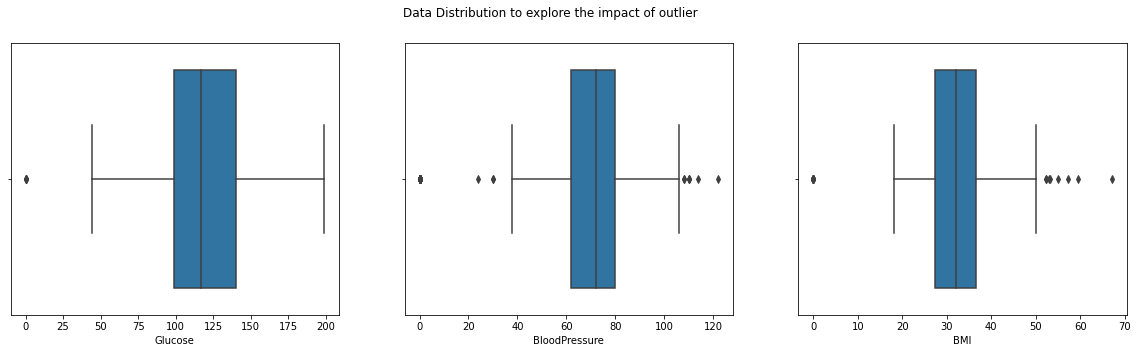

In [ ]:
# Visualizing the distribution 
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.boxplot(x=df["Glucose"], ax= axes[0])
sns.boxplot(x=df["BloodPressure"], ax= axes[1])
sns.boxplot(x=df["BMI"], ax= axes[2])
plt.suptitle("Data Distribution to explore the impact of outlier")
plt.show()


As per the above distribution of data, all the three features has certain number of outliers in the given dataset. therefore, fthe median value is considered for the missing value impuatation.

In [ ]:
# Replacing the missing value with median
# Glucose
df["Glucose"]= df["Glucose"].replace(0,df["Glucose"].median())

# BMI
df["BMI"]= df["BMI"].replace(0,df["BMI"].median())

# BloodPressure
df["BloodPressure"]= df["BloodPressure"].replace(0,df["BloodPressure"].median())


**Multi-variant Imputation of the missing value for the features [`Insulin`and `skin thickness`] where the count is above 25%**

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [ ]:
# Changing the Zero Value in np.nan
X= df.copy()
X[["Insulin","SkinThickness"]]= X[["Insulin","SkinThickness"]].replace(0,np.nan)
X[["Insulin","SkinThickness"]].isna().sum()

Insulin          374
SkinThickness    227
dtype: int64

In [ ]:
# Imputing the missing value
column_names =X.columns
impute_it =IterativeImputer()
result = impute_it.fit_transform(X)
result= result.round(2)
result

# Creating a new dataframe with No missing value
df_imputed = pd.DataFrame(result,columns=column_names)
df_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00,219.01,33.6,0.63,50.0,1.0
1,1.0,85.0,66.0,29.00,70.35,26.6,0.35,31.0,0.0
2,8.0,183.0,64.0,21.54,268.03,23.3,0.67,32.0,1.0
3,1.0,89.0,66.0,23.00,94.00,28.1,0.17,21.0,0.0
4,0.0,137.0,40.0,35.00,168.00,43.1,2.29,33.0,1.0


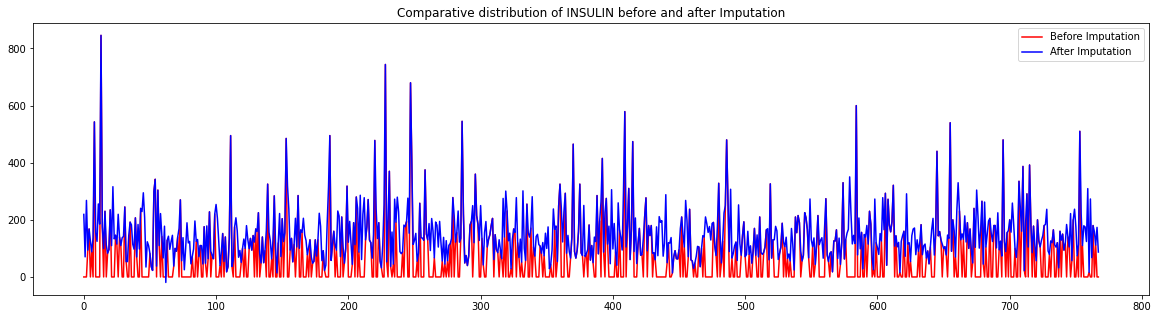

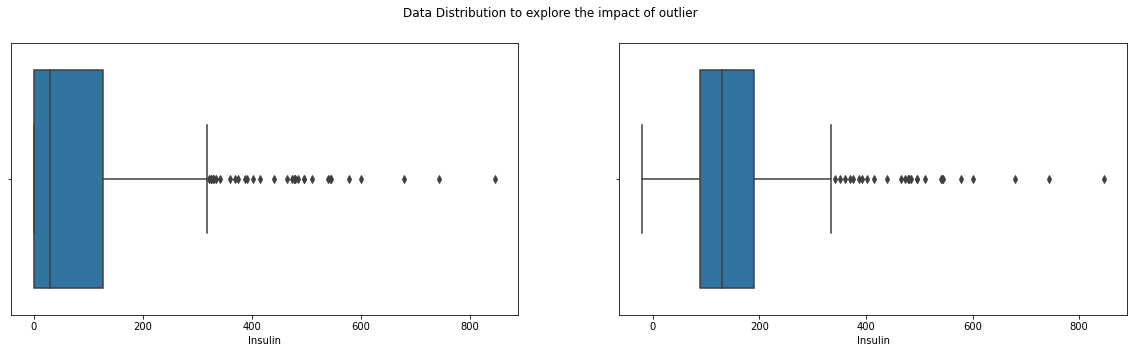

In [ ]:
# Exploring the distribution of `insulin` column before and after imputation
plt.figure(figsize=(20,5))
plt.plot(df["Insulin"],c="r",label="Before Imputation")
plt.plot(df_imputed["Insulin"],c="blue", label="After Imputation")
plt.legend()
plt.title("Comparative distribution of INSULIN before and after Imputation")
plt.show()

# Visualizing the distribution 
fig,axes = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(x=df["Insulin"], ax= axes[0])
sns.boxplot(x=df_imputed["Insulin"], ax= axes[1])
plt.suptitle("Data Distribution to explore the impact of outlier")
plt.show()


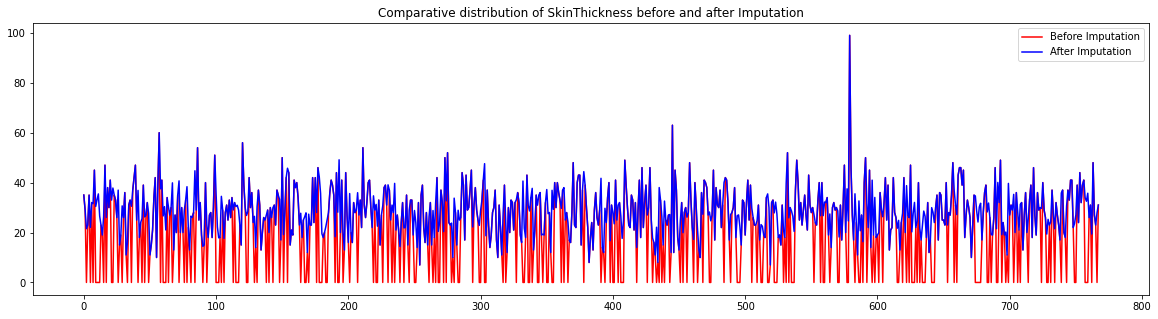

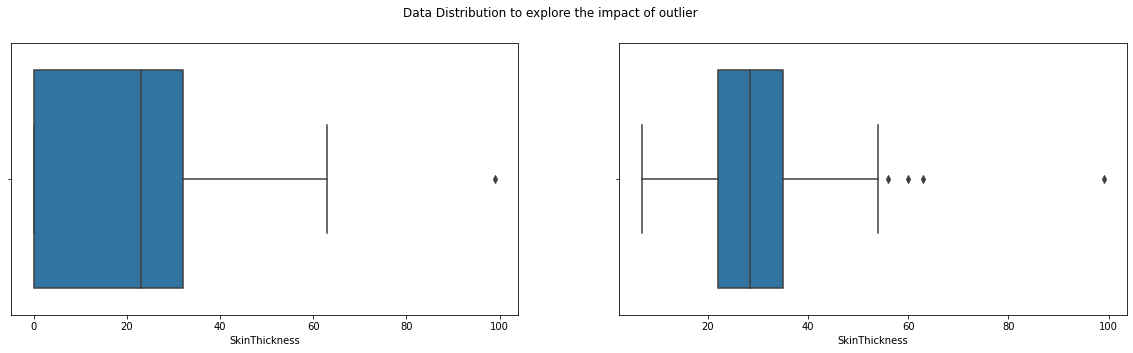

In [ ]:
# Exploring the distribution of `insulin` column before and after imputation
plt.figure(figsize=(20,5))
plt.plot(df["SkinThickness"],c="r",label="Before Imputation")
plt.plot(df_imputed["SkinThickness"],c="blue", label="After Imputation")
plt.legend()
plt.title("Comparative distribution of SkinThickness before and after Imputation")
plt.show()

# Visualizing the distribution 
fig,axes = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(x=df["SkinThickness"], ax= axes[0])
sns.boxplot(x=df_imputed["SkinThickness"], ax= axes[1])
plt.suptitle("Data Distribution to explore the impact of outlier")
plt.show()

**Note**</br>
After completing the imputation process, it was observed that there are still certain data point where the insulin level has gone below zero[because of regression method] and which is not possible. Therefore a blanket filter method is used where any insulin level below 5 is considered as 5 as normal fasting insulin levels range between 5 and 15 μU/mL.

In [ ]:
# Exploring the data point where the insule level is below five
df_imputed[df_imputed["Insulin"]<5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
62,5.0,44.0,62.0,21.03,-19.23,25.0,0.59,36.0,0.0


In [ ]:
# Modifing the minimum insulin level  to 5 μU/mL.
df_imputed.loc[df_imputed["Insulin"]<5, "Insulin"] = 5

In [ ]:
# Final exploring the data set after impuation of all the Zero/Missing value for the features
df_imputed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,28.909740,152.592773,32.450911,0.471823,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.520021,97.290616,6.875366,0.331293,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,5.000000,18.200000,0.080000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,22.110000,89.512500,27.500000,0.240000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.485000,130.230000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,189.760000,36.600000,0.630000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Saving the data into new csv file 
df_imputed.to_excel("/content/drive/MyDrive/SimpliLearn-Capstone/HealthCare/data_imputed.xlsx",sheet_name='imputed_data')

####**2. Create a count (frequency) plot describing the data types and the count of variables.**

In [ ]:
# Exploring the Datatype of the features before imputing the data and after imputing the missing value
data_info=[]
for col in df.columns:
  data_info.append({"Column":col,"Count":df_imputed[col].count(),"type":df[col].dtype})
data_info

[{'Column': 'Pregnancies', 'Count': 768, 'type': dtype('int64')},
 {'Column': 'Glucose', 'Count': 768, 'type': dtype('int64')},
 {'Column': 'BloodPressure', 'Count': 768, 'type': dtype('int64')},
 {'Column': 'SkinThickness', 'Count': 768, 'type': dtype('int64')},
 {'Column': 'Insulin', 'Count': 768, 'type': dtype('int64')},
 {'Column': 'BMI', 'Count': 768, 'type': dtype('float64')},
 {'Column': 'DiabetesPedigreeFunction',
  'Count': 768,
  'type': dtype('float64')},
 {'Column': 'Age', 'Count': 768, 'type': dtype('int64')},
 {'Column': 'Outcome', 'Count': 768, 'type': dtype('int64')}]

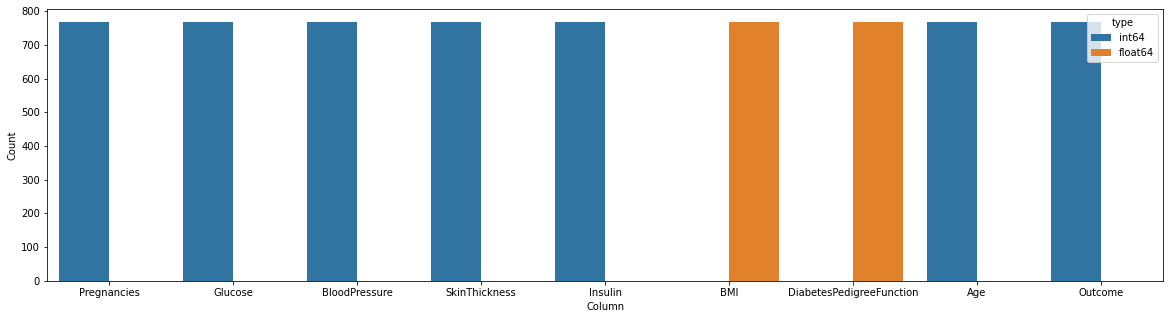

In [ ]:
# Ploting the  cout of each variable
plt.figure(figsize=(20,5))
sns.barplot(data = pd.DataFrame(data_info),x = "Column",y ="Count", hue="type")
plt.show()

####**3. Exploring and Handling the Outliers in the dataset**

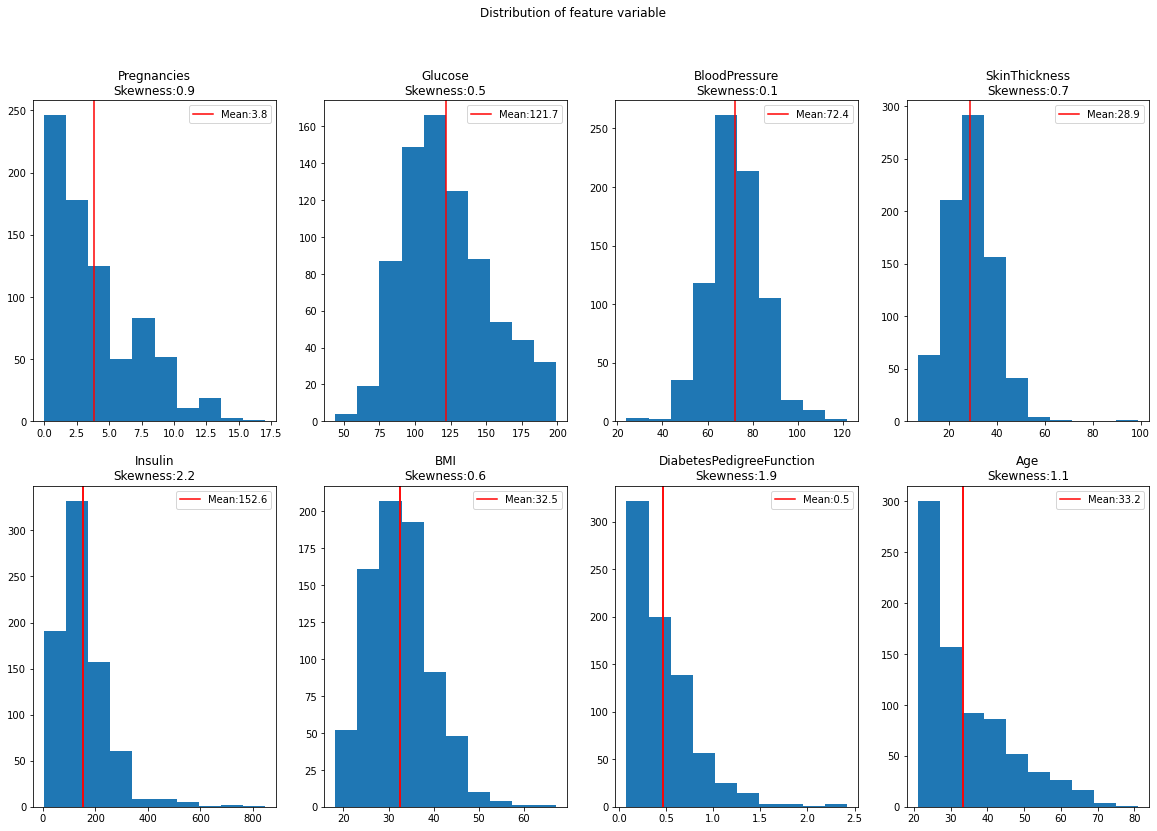

In [ ]:
# Visualizing the Distribution of the feature data to strategies the treatement of the outliers
features = df_imputed.drop("Outcome",axis=1)
fig, axes = plt.subplots(2,4,figsize=(20,13))
for index,col in enumerate(features.columns):
  if(index<4):
    axes[0,index].hist(df_imputed[col])
    axes[0,index].axvline(df_imputed[col].mean(),c="r",label=f"Mean:{df_imputed[col].mean().round(1)}")
    axes[0,index].title.set_text(f"{col}\nSkewness:{df_imputed[col].skew().round(1)}")
    axes[0,index].legend()
  else:
    axes[1,index-4].hist(df_imputed[col])
    axes[1,index-4].axvline(df_imputed[col].mean(),c="r")
    axes[1,index-4].axvline(df_imputed[col].mean(),c="r",label=f"Mean:{df_imputed[col].mean().round(1)}")
    axes[1,index-4].title.set_text(f"{col}\nSkewness:{df_imputed[col].skew().round(1)}")
    axes[1,index-4].legend()
plt.suptitle("Distribution of feature variable")
plt.show()

**Note**</br>
Based on the above distribution of data and the skewness score of the feature variables the following strategies are adopted to check and handle the outlier in the features respectively
- `Glucose`,`Blood Pressure` and `BMI` can be considered as normally distributed data and  and z-score of any value above 3 is considered as outlier and capped .
- All the remaining features are  right skewed , therefore, any value above the upper quartile range and lower quartile range are considered as outliers and capped

**Handling the Outliers for the Features that are normally distributed i.e "Glucose","BloodPressure", "BMI"**

In [ ]:
# Setting the upper limit and lower limit Z-score
upperlimit = 3
lowerlimit = -3

# Z-score function
def z_score(m,s,value):
  zscore = (value-m)/s
  if zscore>3:
    return m+(3*s)
  elif zscore<-3:
    return m-(3*s)
  else:
    return value


#  Normal Distributed features 
nd_f = ["Glucose","BloodPressure", "BMI"]

#Handling the Outliers for the features Glucose,Blood Pressure and BMI
for col in nd_f:
  m= df_imputed[col].mean()
  s= df_imputed[col].std()

  # Capping the oultiers
  df_imputed[col] = df_imputed[col].apply(lambda x :z_score(m,s,x))

df_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00,219.01,33.6,0.63,50.0,1.0
1,1.0,85.0,66.0,29.00,70.35,26.6,0.35,31.0,0.0
2,8.0,183.0,64.0,21.54,268.03,23.3,0.67,32.0,1.0
3,1.0,89.0,66.0,23.00,94.00,28.1,0.17,21.0,0.0
4,0.0,137.0,40.0,35.00,168.00,43.1,2.29,33.0,1.0


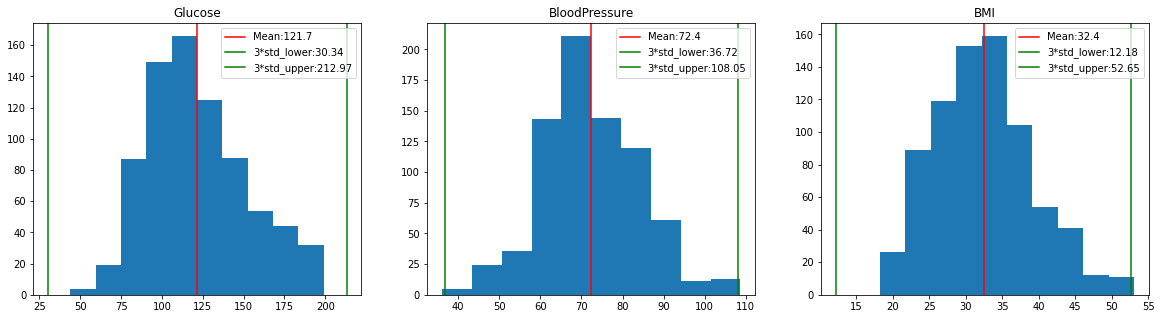

In [ ]:
# visulizing the feature after treating the outliers
fig, axes = plt.subplots(1,3,figsize=(20,5))
for index,col in enumerate(nd_f):
  m = df_imputed[col].mean()
  sd_3 = df_imputed[col].std()*3
  axes[index].hist(df_imputed[col])
  axes[index].axvline(df_imputed[col].mean(),c="r",label=f"Mean:{df_imputed[col].mean().round(1)}")
  axes[index].axvline(m-sd_3,c="g",label=f"3*std_lower:{(m-sd_3).round(2)}")
  axes[index].axvline(m+sd_3,c="g",label=f"3*std_upper:{(m+sd_3).round(2)}")
  axes[index].title.set_text(f"{col}")
  axes[index].legend()


After the treatment of outliers,all the data for the features mentioned above are within the range of +-3 standard deviation from the mean.

**Handling the Outliers for the Features that are not normally distributed and higly skewed**

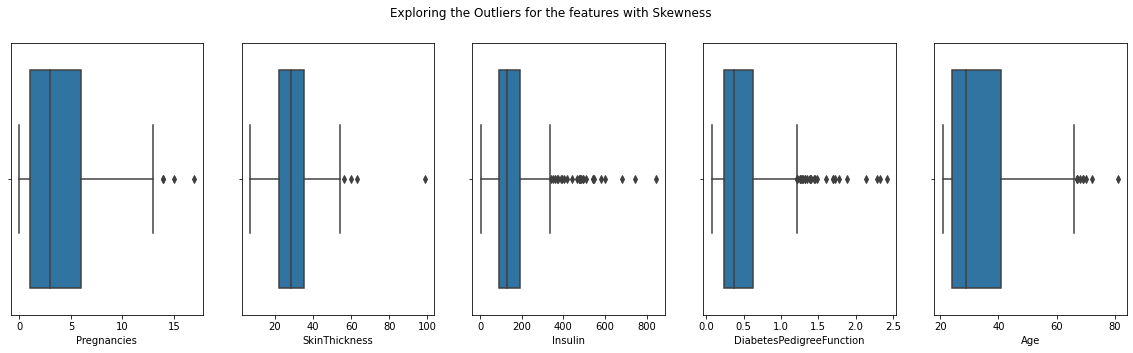

In [ ]:
# Filtering out the Skewed features
skw_f = [col for col in features.columns if col not in nd_f]

# visulizing the feature before treating the outliers
fig, axes = plt.subplots(1,len(skw_f),figsize=(20,5))
for index, col in enumerate(skw_f):
  sns.boxplot(x=df_imputed[col],ax = axes[index])
plt.suptitle("Exploring the Outliers for the features with Skewness")
plt.show()  


In [ ]:
#Treating the outlier by the capping the outliers with upper and lower limit value respectively
for col in skw_f:
  IQR = df_imputed[col].quantile(.75) - df_imputed[col].quantile(.25)
  upper_limit = df_imputed[col].quantile(.75)+ IQR *1.5
  lower_limit = df_imputed[col].quantile(.25)-IQR*1.5

  # Capping the outliers 
  df_imputed[col] = np.where(df_imputed[col]>upper_limit,upper_limit,
                             np.where(df_imputed[col]<lower_limit,lower_limit,df_imputed[col]))


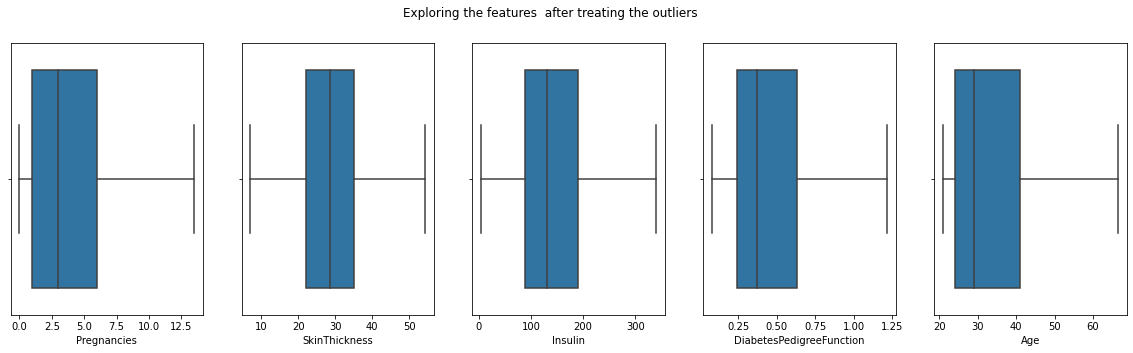

In [ ]:
# visulizing the feature after treating the outliers
fig, axes = plt.subplots(1,len(skw_f),figsize=(20,5))
for index, col in enumerate(skw_f):
  sns.boxplot(x=df_imputed[col],ax = axes[index])
plt.suptitle("Exploring the features  after treating the outliers")
plt.show()

### **Exploratory data analysis**

#### **Uni-variant Analysis**

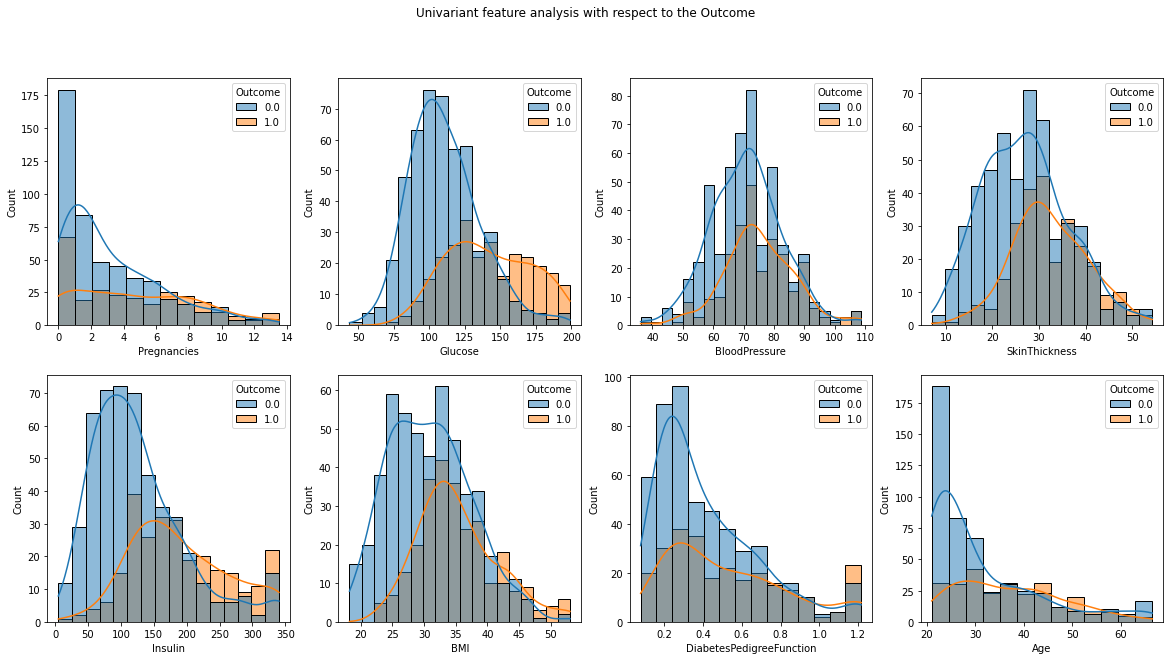

In [ ]:
# Exploring the Features with respect to the outcomes 
fig,axes = plt.subplots(2,4,figsize=(20,10))
for index,column in enumerate(df_imputed.columns[:-1]):
  if index <4:
    sns.histplot(data= df_imputed, x=column, kde=True , hue ="Outcome",ax=axes[0,index])
  else:
    sns.histplot(data= df_imputed, x=column, kde=True , hue ="Outcome", ax=axes[1,index-4])
plt.suptitle("Univariant feature analysis with respect to the Outcome ")
plt.show()


Based on the above plot,the observations drawn are as follows :
- The overall Pregnancies data is right skewed as the count of women decreases with the increase of the number of babies per woman. But the chances of being diabetic in proportion increases proportionally as the number of babies increases.
- Majority of  the data represents the glucose in between 75- 130, but the majority of the diabetic patients are in the range between 100 - 200. Therefore it can be inferred that the glucose level is the strong determinant of being a diabetic patient.
- The blood pressure in isolation has no strong impact on being a diabetic patient as the distribution of diabetic and non-diabetic patients are spread across the entire data set.
- The similar inference can also be drawn for BodyMaxindex and DiabetesPedigree as in both the cases the diabetic patent is uniformly distributed across the range.
- In regards with the Skin thickness, the thickness above the value of 27 is the strong reflection of being diabetic.
- The Insulin level is the key reason for diabetes as the data clearly indicates that above the level of 80-100 most patients are diabetic. The similar observation can be seen  in the age data where at the older age women suffer from diabetes.

#### **Multi-variant Analysis**

#####  **4.Understand the relationships between feature Variable**

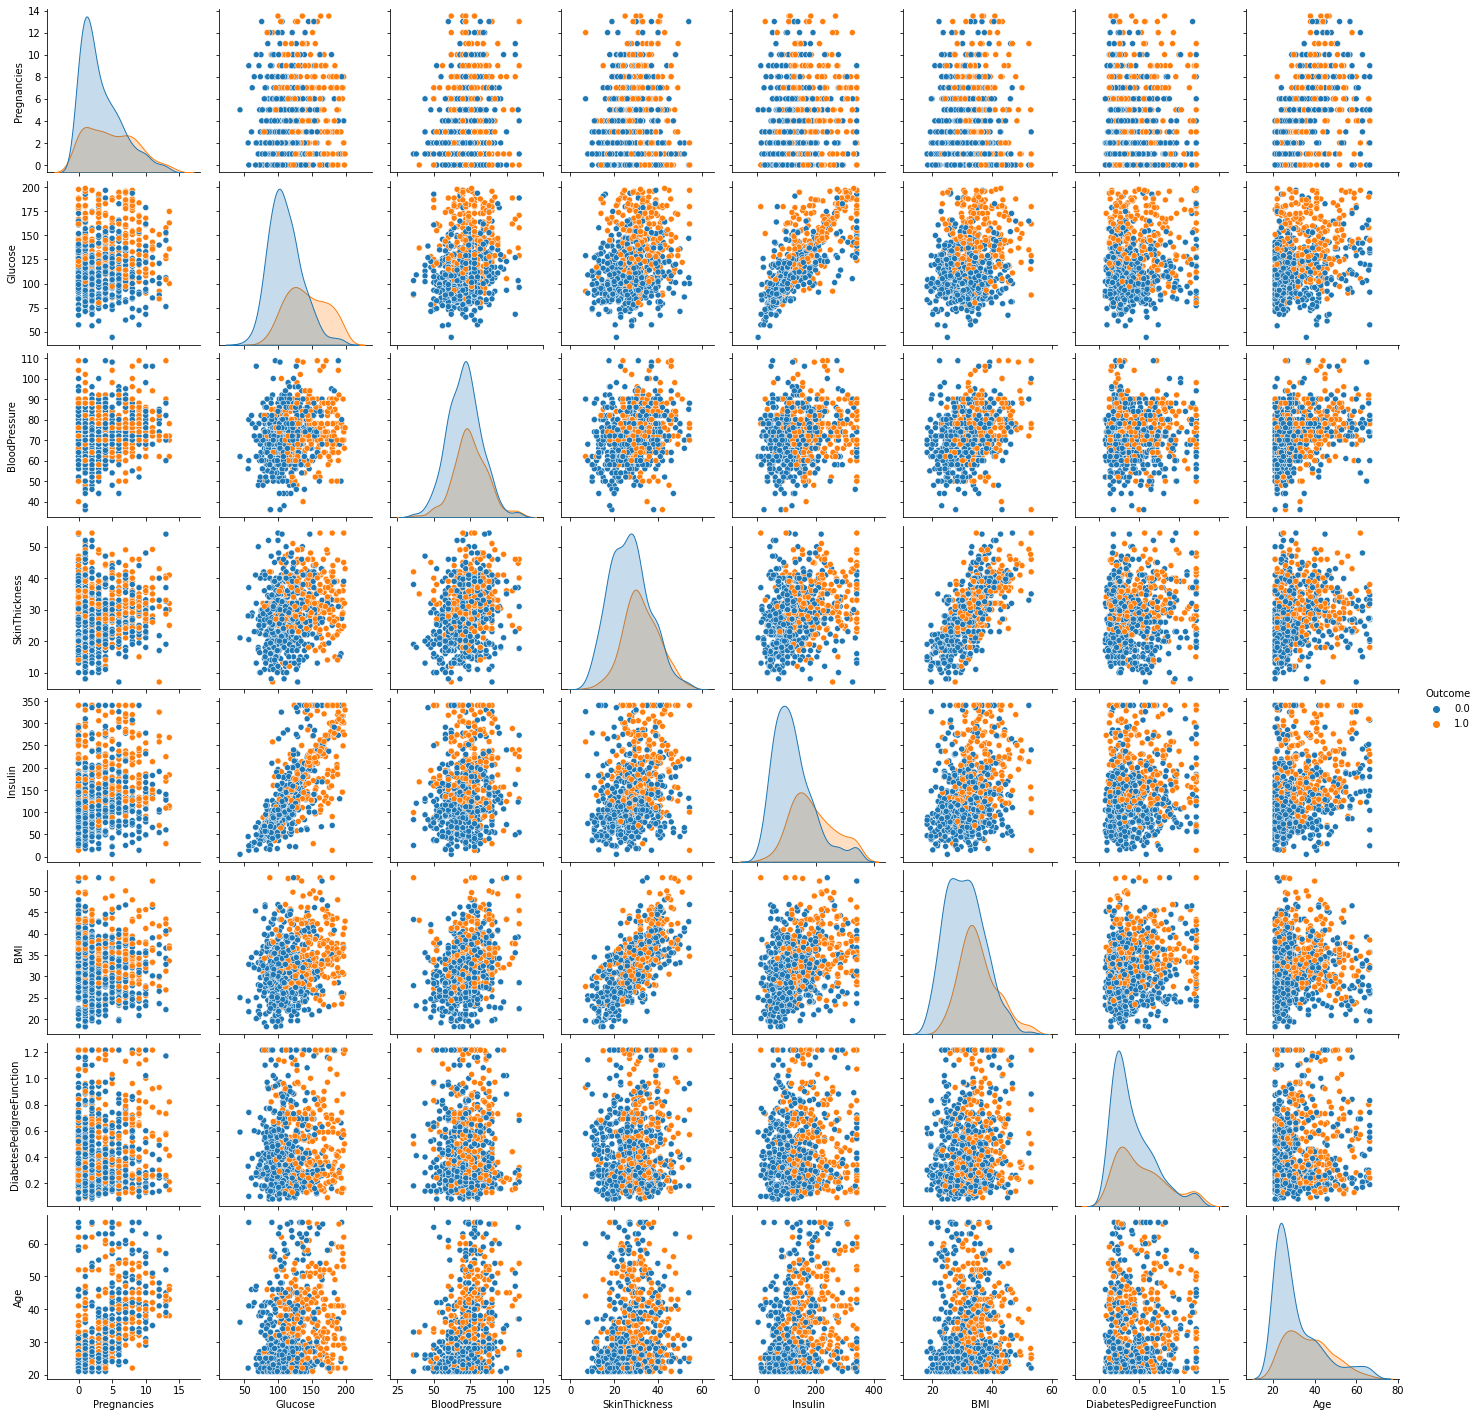

In [ ]:
# Multi-Variant Analysis
sns.pairplot(df_imputed,hue="Outcome")
plt.show()

Based on the above paiplot, the inference drawn are as follows:
- As observed in the univarant analysis, all features are uniformly spreaded across the pregency count of women.
- Patient with high Glucose level and high insulin level are more prone to diabetices as hold a strong linear realtionship as observed for glucose-insuline scatter plot.
- The skinthickness and body mass index are linearly related as observed in the scatter plot however the diabetic patient are spread across primarly above the 40 unit for BMI and 25 for skinthickness
- Insuline level and glucose level increase with age where as  blood pressure is can be the problem across all age primarly above 30 years.

##### **5.Exploring the correlation between feature variables and Selecting the Important and relevant features**

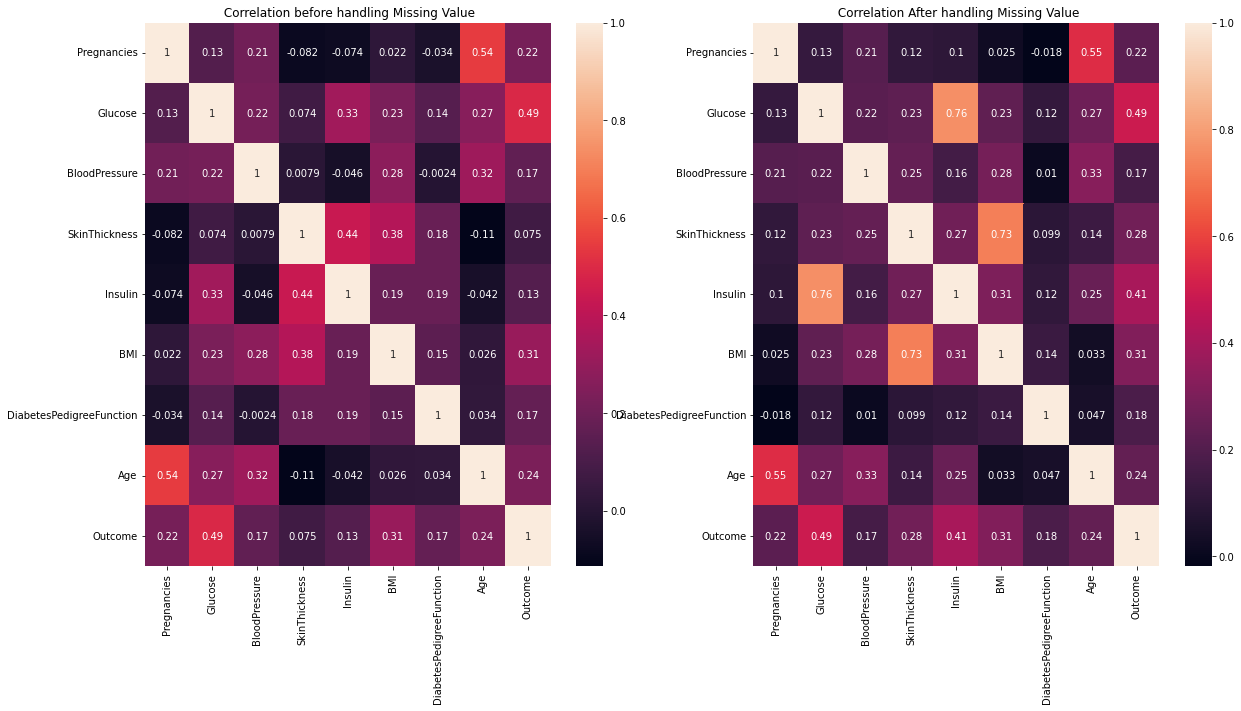

In [ ]:
# Visulization of the feature variable
fig, axes =plt.subplots(1,2,figsize=(20,10))
sns.heatmap(df.corr(),annot=True, ax = axes[0])
axes[0].set_title(" Correlation before handling Missing Value")

sns.heatmap(df_imputed.corr(),annot=True, ax = axes[1])
axes[1].set_title(" Correlation After handling Missing Value")
plt.show()

As per the correlation matrix , the inference drawn are as follows:
1. The `Glucose` level and `Insulin` are strongly postively correlated  with each other with the coefficent of 0.7 .But the correaltion coeffiecent before handling the missing value is below 0.5. Therefore both the insulin and the glucose can be considered for futher analysis however to avoid the impact of multi-collinearity Randomforest alogrithm can be adopted for classification model.

2. In the case of the Age and the chances of having more kids i.e pregnancies count  where the correaltion coefficent is just above 0.5, both the features can be considered for futher analysis to check the statistically significance of the features.

**Checking the statistically significance of the correlation coefficent for age with respect to Pregnancy count.**

 $H_0$: $ p =0 $<br>
correlation coefficient IS NOT significantly different from zero i.e `age` is independent from ` pregnancies count`<br><br>
 $H_1$: $\text{$ p \neq 0 $}$ <br>
correlation coefficient IS significantly different from zero i.e `age` is not independent from from ` pregnancies count`<br><br>

In [ ]:
# Importing the scipy Library
from scipy import stats

In [ ]:
# Explore the p-value
r_correlation, p_value = stats.pearsonr(df_imputed["Pregnancies"], df_imputed["Age"])
print(f"Correlations :{r_correlation}")
print(f"p_value :{p_value}")

Correlations :0.5496954682447696
p_value :7.508309249607474e-62


Based on the above,correlation coefficient of Age with respect to Pregnancies are statistically significant as p-value is less than 0.05 and it rejects the null hypothesis.Therefore it can be inferred that age has a relationship between the  Pregnancies count and validates the assumption of multi collinearity between age and Pregnancies count.

### **Modelling**

#### **Check the balance of the data by plotting the count of outcomes by their value.Describe your findings and plan future course of actions.**

In [ ]:
# Calculating the data distribution 
(df_imputed["Outcome"].value_counts()/df_imputed.shape[0]*100)

0.0    65.104167
1.0    34.895833
Name: Outcome, dtype: float64

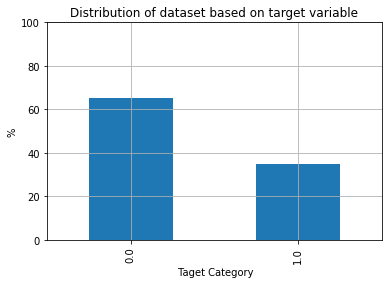

In [ ]:
# Visulizing the data distribution based on target variable
(df_imputed["Outcome"].value_counts()/df_imputed.shape[0]*100).plot(kind="bar")
plt.ylim(0,100)
plt.title("Distribution of dataset based on target variable")
plt.xlabel(" Taget Category")
plt.ylabel("%")
plt.grid()
plt.show()

Based on the above distibution it ic clear that it is an imbalance dataset as the postive outcome i.e  woman with diabetes count is less than 35% and the remaining 65.10% is negative. Therefore following stratiges are adopted for exploring the best classification model:
1. Spliting the Data into train and test set
2. Upsampling the data i.e. Synthetic Minority Oversampling Technique, or SMOTE for short and then appling the classification model i.e:
 - logistic Regression
 - KNN 

3. Applying classification model which are not effected by class imbalance i.e:
 - RandomForest   
 - XGboost  

4. Comparing the results of all the model to find out the best model 
 using Evalution matrix

##### **1.Spliting into train and test Dataset**

In [ ]:
# Creating the train and test dataset 
from sklearn.model_selection import train_test_split

In [ ]:
X= df_imputed.drop("Outcome",axis=1)
y = df_imputed["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(f"The train dataset contians {X_train.shape[0]} rows and {X_train.shape[1]} columns ")
print(f"The test dataset  contians {X_test.shape[0]} rows and {X_test.shape[1]} columns ")

The train dataset contians 514 rows and 8 columns 
The test dataset  contians 254 rows and 8 columns 


#####**2.Upsampling**

######**Oversampling Technique i.e. Synthetic Minority Oversampling Technique, or SMOTE**

In [ ]:
# importing the library for SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
# transform the dataset
oversample = SMOTE()
X_train_up, y_train_up = oversample.fit_resample(X_train, y_train)

In [ ]:
print(f"The feature data has {X_train_up.shape[0]} rows and {X_train_up.shape[1]} columns")
print(f"The target data has {y_train_up.shape[0]} rows")

The feature data has 664 rows and 8 columns
The target data has 664 rows


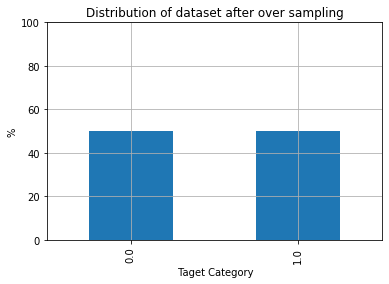

In [ ]:
# Visulizing the data distribution based on target variable after over sampling
(y_train_up.value_counts()/y_train_up.shape[0]*100).plot(kind="bar")
plt.ylim(0,100)
plt.title("Distribution of dataset after over sampling")
plt.xlabel(" Taget Category")
plt.ylabel("%")
plt.grid()
plt.show()

After the oversampling of the imbalance dataset the distribution is now balanced with 50% for both postive and negative outcome.

**Compare the orginal train dataset with new upsample dataset  in lower dimension using PCA**

In [ ]:
# import the library 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Intializing the Umap Class
reducer=PCA(n_components=2)
sc =StandardScaler()

# Creating the Train dataset before upSample 
X_train_values = X_train.copy()
X_train_data = sc.fit_transform(X_train_values)


# Creating the Train dataset after upSample of data 
X_train_upsample_values = X_train_up.copy()
X_train_upsample_data = sc.transform(X_train_upsample_values)
X_train_upsample_data


# Using PCA
pca_or = reducer.fit_transform(X_train_data)
pca_up = reducer.fit_transform(X_train_upsample_data)



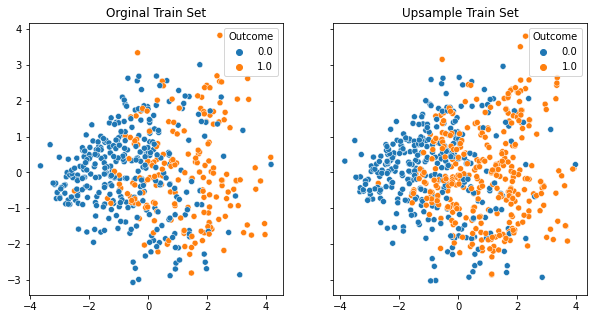

In [ ]:
# Ploting both the data set to compare
fig, axes = plt.subplots(1,2,figsize=(10,5),sharey=True)
sns.scatterplot(x =pca_or[:,0],y =pca_or[:,1],hue =y_train,ax =axes[0])
axes[0].title.set_text("Orginal Train Set")
sns.scatterplot(x =pca_up[:,0],y =pca_up[:,1],hue =y_train_up,ax =axes[1])
axes[1].title.set_text("Upsample Train Set")
plt. show()


##### **Exploring the distibutuon of  data after applying Oversampling and handling the feature with Skewed distribution**

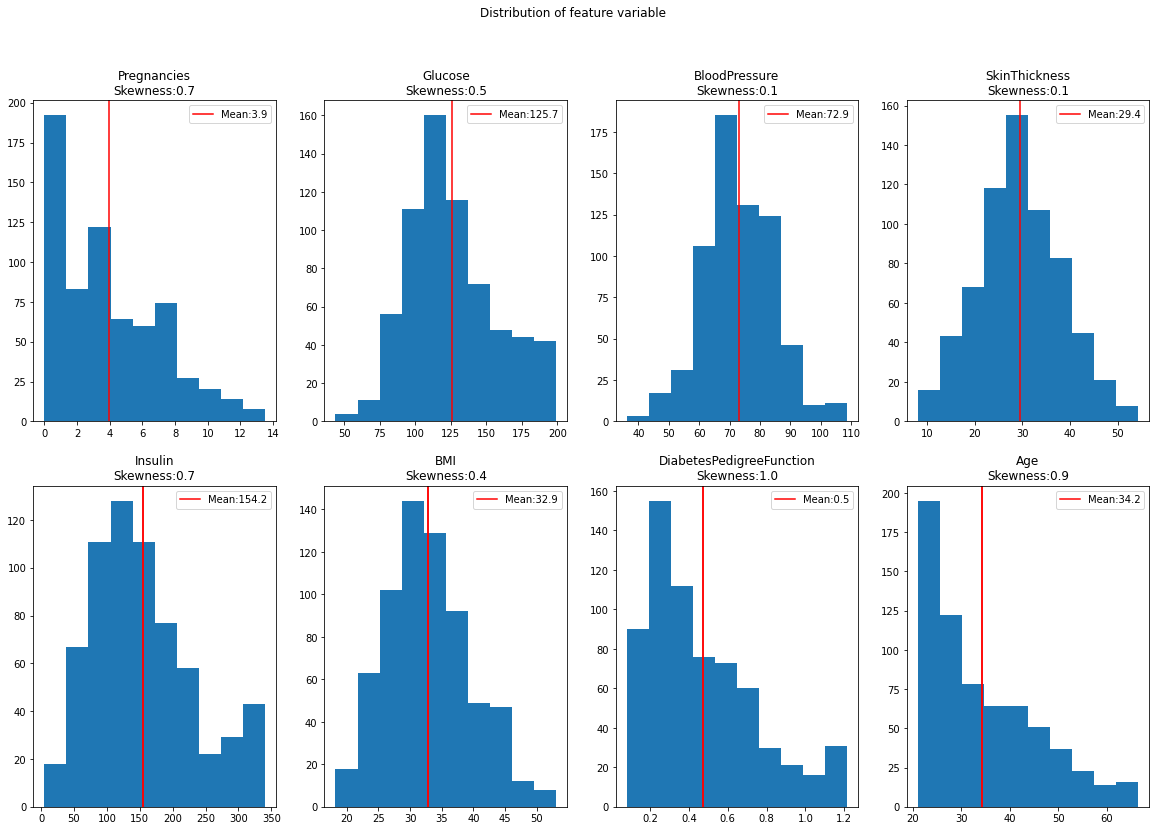

In [ ]:
# Visualizing the Distribution of the feature data 
fig, axes = plt.subplots(2,4,figsize=(20,13))
for index,col in enumerate(X_train_up.columns):
  if(index<4):
    axes[0,index].hist(X_train_up[col])
    axes[0,index].axvline(X_train_up[col].mean(),c="r",label=f"Mean:{X_train_up[col].mean().round(1)}")
    axes[0,index].title.set_text(f"{col}\nSkewness:{X_train_up[col].skew().round(1)}")
    axes[0,index].legend()
  else:
    axes[1,index-4].hist(X_train_up[col])
    axes[1,index-4].axvline(X_train_up[col].mean(),c="r")
    axes[1,index-4].axvline(X_train_up[col].mean(),c="r",label=f"Mean:{X_train_up[col].mean().round(1)}")
    axes[1,index-4].title.set_text(f"{col}\nSkewness:{X_train_up[col].skew().round(1)}")
    axes[1,index-4].legend()
plt.suptitle("Distribution of feature variable")
plt.show()

 All the features where the Skew score is above 0.5 are right skewed and the below -0.05 are left skewed. Based on the above distribution plot , Age, DiabetsPedigreeFunction, Insulin and Pregnancies are right skewed . Therefore for logistic regression, the features are transformed accordingly to convert into Normal distributed feature before fiting the training set to the model


In [ ]:
# importing the preprocessing class from Sklearn 
from sklearn.preprocessing import PowerTransformer,FunctionTransformer

# importing the Q-Q plt class from stats model
import statsmodels.api as sm

In [ ]:
X_train_up.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000
mean,3.944477,125.736373,72.944006,29.413239,154.151723,32.903945,0.470701,34.212209
std,3.168635,31.025411,11.424072,8.814195,77.804082,6.699352,0.280909,11.398854
min,0.000000,44.000000,36.096794,8.000000,5.000000,18.200000,0.080000,21.000000
25%,1.000000,103.000000,66.000000,23.470130,97.692500,28.000000,0.253181,25.000000
50%,3.000000,120.000000,72.000000,29.000000,140.000000,32.360608,0.400000,31.000000
75%,6.000000,144.250000,80.000000,35.000000,194.540000,37.312209,0.630000,42.000000
max,13.500000,199.000000,108.676644,54.335000,340.131250,53.077011,1.215000,66.500000


In [ ]:
#  Extracting the fetaure with skewed distribution 
skewed_column =[]
for col in X_train_up.columns:
  if X_train_up[col].skew().round(1)>.5 or X_train_up[col].skew().round(1)<-.5:
    skewed_column.append(col)

In [ ]:
# Tranforing into normal ditribution 
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans_train = power.fit_transform(X_train_up[skewed_column])
data_trans_test = power.transform(X_test[skewed_column])

X_train_up[skewed_column] = data_trans_train
X_test[skewed_column]= data_trans_test
X_train_up.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.565520,115.0,98.0,21.05,-0.511746,24.0,1.632390,0.255989
1,1.003282,142.0,60.0,33.00,0.574426,28.8,0.953649,1.755998
2,0.257873,116.0,72.0,12.00,-0.843478,22.1,0.213714,0.513989
3,-0.947096,126.0,60.0,27.90,0.385332,30.1,-0.268196,1.164504
4,-0.063903,78.0,70.0,28.70,-1.266197,32.5,-0.692981,0.666906


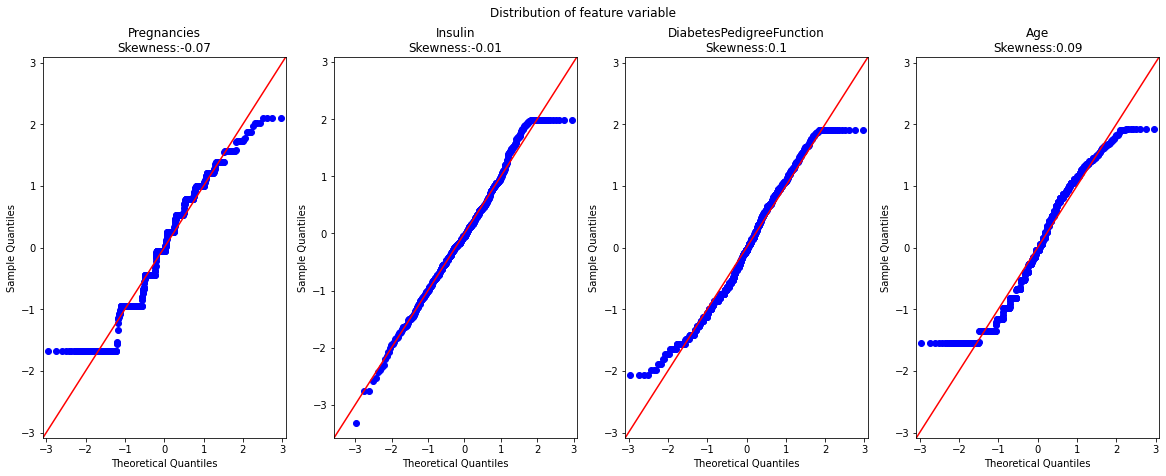

In [ ]:
# Visualizing the Distribution of the feature data to strategies the treatement of the outliers
fig, axes = plt.subplots(1,4,figsize=(20,7))
for index,col in enumerate(skewed_column):
    sm.qqplot(X_train_up[col], line ='45',ax=axes[index])
    axes[index].title.set_text(f"{col}\nSkewness:{X_train_up[col].skew().round(2)}")
plt.suptitle("Distribution of feature variable")
plt.show()

The Q-Q plot clearly shows that the quantile points do not lie on the theoretical normal line. We see that the sample values are generally lower than the normal values for quantiles along the smaller side of the distribution.

##### **Standardisation of the Feature variables**

In [ ]:
# Importing the StandardScaler Class
from sklearn.preprocessing import StandardScaler

In [ ]:
# Initialization the  Standardscaler class
scaler = StandardScaler()
X_train_up_scaled = scaler.fit_transform(X_train_up)
X_test_up_scaled = scaler.transform(X_test)

X_train_up = pd.DataFrame(X_train_up_scaled, columns=X_train_up.columns)
X_test = pd.DataFrame(X_test_up_scaled, columns=X_train_up.columns)


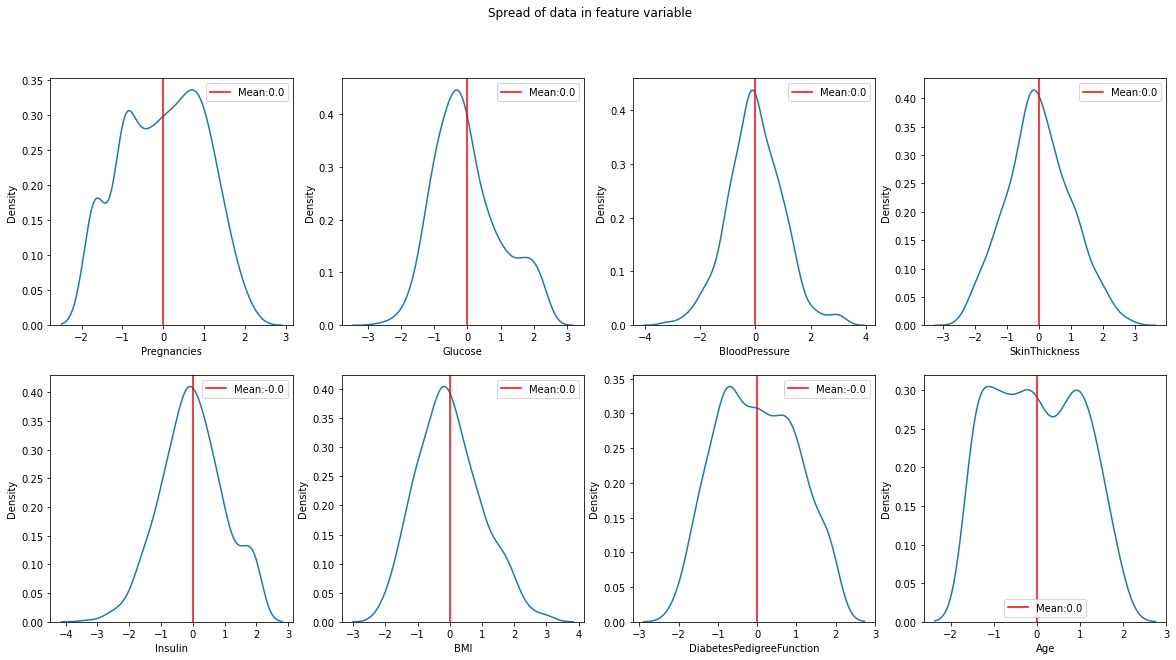

In [ ]:
# Visualizing the Distribution of the feature data 
fig, axes = plt.subplots(2,4,figsize=(20,10))
for index,col in enumerate(X_train_up.columns):
  if(index<4):
    sns.kdeplot(X_train_up[col],ax=axes[0,index])
    axes[0,index].axvline(X_train_up[col].mean(),c="r",label=f"Mean:{X_train_up[col].mean().round(1)}")
    axes[0,index].legend()
  else:
    sns.kdeplot(X_train_up[col],ax=axes[1,index-4])
    axes[1,index-4].axvline(X_train_up[col].mean(),c="r",label=f"Mean:{X_train_up[col].mean().round(1)}")
    axes[1,index-4].legend()
plt.suptitle("Spread of data in feature variable")
plt.show()

After Standardization , all teh feature variable are now nornally  distributed as the mean value is zero and the skew value in within the range of -0.5 to +0.5.

###### **Model-1: Logistic Regression Pipelines to perform Hyperparameter Tuning Using Grid SearchCV**


In [ ]:
# Importing the Library
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [ ]:
# Create a pipeline
estimators = [('classifier', LogisticRegression())]

pipe = Pipeline(estimators)

# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"classifier": [LogisticRegression(max_iter=500)],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 },
                  ]

# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model_1 = gridsearch.fit(X_train_up,y_train_up)
best_model_1.best_params_

{'classifier': LogisticRegression(C=7.742636826811269, max_iter=500),
 'classifier__C': 7.742636826811269,
 'classifier__penalty': 'l2'}

In [ ]:
# Exploring the coefficent of the feature variables
coefs =best_model_1.best_estimator_.named_steps.classifier.coef_

intercept = best_model_1.best_estimator_.named_steps.classifier.intercept_

# creating the dataframe to compare the log of Odds for each coefficent
coefficent_df = pd.DataFrame({"Features":["intercept",*X_train_up.columns],"Coeff":[*intercept,*coefs[0]]})


# Calcuating the log of Odds 
coefficent_df["odds_ratio"]= coefficent_df["Coeff"].apply(lambda x: np.exp(x))
coefficent_df.set_index("Features").T

Features,intercept,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Coeff,0.006899,0.171228,1.01707,-0.258768,0.068583,0.169392,0.720833,0.271441,0.674567
odds_ratio,1.006923,1.186762,2.76508,0.772002,1.070990,1.184585,2.056145,1.311854,1.963183


**Analyzing the Odds Ratio of the feature Variable**

Based on the logistic regression model,
- For ever one increase in the count Pregnancies level, the odds of a being diabetic increase by the factor of 1.31
- Glucose have a wider influence of being diabetic as the odds of being diabetic increase by 2.97 for every unit increase in glucose level in the body.
- The Body mass Index is also an import feature as every unit increase leads to the increase of odd being diabetic by the factor of 2.27


**Evalutation Matrix**

In [ ]:
# import the library
from sklearn.metrics import classification_report,plot_confusion_matrix, confusion_matrix

In [ ]:
def conf_matrix(model,X_test,y_text):
  # Get class predictions
  y_pred = model.predict(X_test)

  # Generate confusion matrix
  tn, fn, fp, tp = confusion_matrix(y_test, y_pred).ravel()

  # label rows and columns
  cf_df = pd.DataFrame(
      [[tp,fp],[fn,tn]], 
      columns=["Predicted Patient  Diabetic", "Predicted Patient not Diabetic"],
      index=["Actual Patient Diabetic", "Actual Patient  not Diabetic"]
  )
  
  display(cf_df)

  # Classification Report
  report_initial_model = classification_report(y_test, y_pred)
  print(report_initial_model)



In [ ]:
# Exploring the Confusion Matrix for model_1
conf_matrix(best_model_1, X_test, y_test)

,Predicted Patient Diabetic,Predicted Patient not Diabetic
Actual Patient Diabetic,63,23
Actual Patient not Diabetic,45,123


              precision    recall  f1-score   support

         0.0       0.84      0.73      0.78       168
         1.0       0.58      0.73      0.65        86

    accuracy                           0.73       254
   macro avg       0.71      0.73      0.72       254
weighted avg       0.75      0.73      0.74       254



In this logistic regression model, at the threshold level of 0.5, the model accuracy is 73% however the type II error is 23 i.e the model fail to capture 23 cases as postive when they are actually positive.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
#  Function to Regenerate scores  and create and calculate the ROC-AUC graph and score respectively 
def roc_auc_calculator(model,X_test,y_test):
  y_proba= model.predict_proba(X_test)[:,1]
  fprs, tprs, thresholds = roc_curve(y_test, y_proba)
  roc_auc = roc_auc_score(y_test, y_proba)
  
  # Getting the best threshold
  J = tprs - fprs
  ix = np.argmax(J)
  best_thresh = thresholds[ix]
  
  return(fprs, tprs, thresholds,roc_auc,best_thresh)


In [ ]:
# Calculating  the AUC score of the model 
auc_model_data=[]
fprs, tprs, thresholds,roc_auc ,best_threshold= roc_auc_calculator(best_model_1, X_test, y_test)
auc_model_data.append({"model":"Model_1_Upsampling: Logistic Regression",
                       "fprs":fprs, 
                       "tprs":tprs, 
                       "thresholds":thresholds,
                       "best_threshold":best_threshold,
                       "roc_auc":roc_auc})

###### **Model-2: KNN Model fitting with K-cross Validation and GridSearchCV**

In [ ]:
# Importing the Library
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Intializing the model
knn = KNeighborsClassifier()

In [ ]:
k_range = list(range(3, 40))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, return_train_score=False,verbose=1)
  
# fitting the model for grid search
best_model_2=grid.fit(X_train_up, y_train_up)

print(best_model_2.best_params_)

Fitting 10 folds for each of 37 candidates, totalling 370 fits
{'n_neighbors': 4}


**Evalutation Matrix**

In [ ]:
# Exploring the Confusion Matrix for model_1
conf_matrix(best_model_2, X_test, y_test)

,Predicted Patient Diabetic,Predicted Patient not Diabetic
Actual Patient Diabetic,56,30
Actual Patient not Diabetic,47,121


              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76       168
         1.0       0.54      0.65      0.59        86

    accuracy                           0.70       254
   macro avg       0.67      0.69      0.68       254
weighted avg       0.71      0.70      0.70       254



In [ ]:
# Calculating  the AUC score of the model-3 
fprs, tprs, thresholds,roc_auc,best_threshold = roc_auc_calculator(best_model_2,X_test,y_test)
auc_model_data.append({"model":"Model_3_Upsampling: KNN",
                       "fprs":fprs, 
                       "tprs":tprs, 
                       "thresholds":thresholds,
                        "best_threshold":best_threshold,
                       "roc_auc":roc_auc})

In the KNN model, the accuray is reduced to 70% and the Type error is also increased to 30  cases i.e the model failed to classify 30 cases as postive when they are 
actually positive. 

###### **Model-3: Randomforest Pipelines to perform Hyperparameter Tuning Using Grid SearchCV**

In [ ]:
# Importing the Library
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create a pipeline
estimators = [('classifier', RandomForestClassifier())]

pipe = Pipeline(estimators)

# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_depth":[5,8,15,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10],}
                  ]

# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=1,n_jobs=-1) # Fit grid search
best_model_3 = gridsearch.fit(X_train_up,y_train_up)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


**Evalutation Matrix**

In [ ]:
# Exploring the Confusion Matrix for model_1
conf_matrix(best_model_3, X_test, y_test)

,Predicted Patient Diabetic,Predicted Patient not Diabetic
Actual Patient Diabetic,68,18
Actual Patient not Diabetic,58,110


              precision    recall  f1-score   support

         0.0       0.86      0.65      0.74       168
         1.0       0.54      0.79      0.64        86

    accuracy                           0.70       254
   macro avg       0.70      0.72      0.69       254
weighted avg       0.75      0.70      0.71       254



In the case of RandomForest Model with the threshold margin of 0.5, the accuracy again climbs up to 70% with a Type II error reduced to 18 cases. 

In [ ]:
# Calculating  the AUC score of the model-3 
fprs, tprs, thresholds,roc_auc,best_threshold = roc_auc_calculator(best_model_3, X_test, y_test)
auc_model_data.append({"model":"Model_3: RandomForest",
                       "fprs":fprs, 
                       "tprs":tprs, 
                       "thresholds":thresholds,
                       "best_threshold":best_threshold,
                       "roc_auc":roc_auc})

###### **Model-4: XGboost Pipelines to perform Hyperparameter Tuning Using Grid SearchCV**

In [ ]:
# Importing the Library
from xgboost import XGBClassifier

In [ ]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 2),
    'n_estimators': list(range(60, 240, 40)),
    'learning_rate': [0.1, 0.01, 0.05],
    "tree_method":['gpu_hist']
}
gridsearch = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = -1,
    cv = 10,
)
best_model_4 =gridsearch.fit(X_train_up,y_train_up)

In [ ]:
# Exploring the best parameters for the Xgboost algorithm
best_model_4.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 180,
 'tree_method': 'gpu_hist'}

**Evalutation Matrix**

In [ ]:
# Exploring the Confusion Matrix for model_1
conf_matrix(best_model_4, X_test, y_test)

,Predicted Patient Diabetic,Predicted Patient not Diabetic
Actual Patient Diabetic,60,26
Actual Patient not Diabetic,43,125


              precision    recall  f1-score   support

         0.0       0.83      0.74      0.78       168
         1.0       0.58      0.70      0.63        86

    accuracy                           0.73       254
   macro avg       0.71      0.72      0.71       254
weighted avg       0.74      0.73      0.73       254



In the XGBoost , the model at the threshold level of 0.5 has the accuracy of 73% but the type II error is more compare to Random forest as the model able  to classify 60 cases as positive but 26 cases are false negative.  

In [ ]:
# Calculating  the AUC score of the model-3 
fprs, tprs, thresholds,roc_auc,best_threshold = roc_auc_calculator(best_model_4, X_test, y_test)
auc_model_data.append({"model":"Model_4: Xgboost",
                       "fprs":fprs, 
                       "tprs":tprs, 
                       "thresholds":thresholds,
                        "best_threshold":best_threshold,
                       "roc_auc":roc_auc})

### **Evalution of Model at optimal Threshold point and Conclusion**

##### **4.Comparing Model-1 vs Model-2 vs Model-3 Vs Model-4 with respect to AUC-ROC curve**

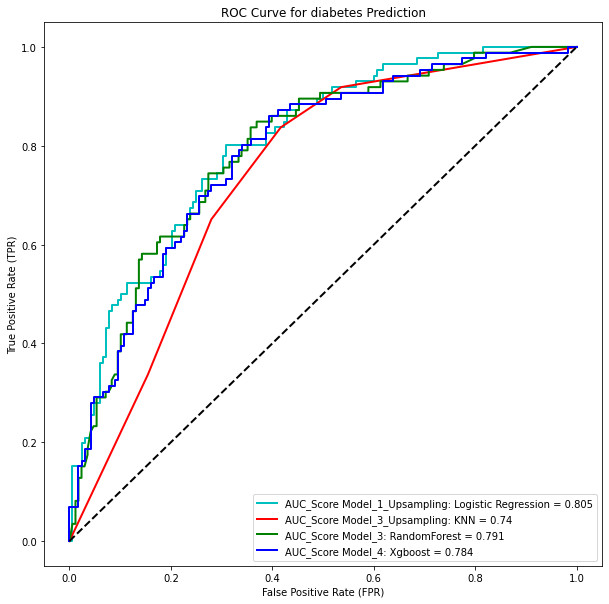

In [ ]:
# Visualizing the Model performance with respect to auc-roc curve
plt.figure(figsize=(10,10))
colors =["c","r","g","b"]
for data, color in zip(auc_model_data,colors):
  plt.plot(data["fprs"], data["tprs"], color=color,
          lw=2, label=f'AUC_Score {data["model"]} = {data["roc_auc"].round(3)}')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for diabetes Prediction')
plt.legend(loc="best")
plt.show()

Based on the ROC-AUC graph is it clear that the XGboost column performs the best as the the auc score is 0.816 compare to the other models i.e. logistic regression , Knn and Random forest where the auc score are .802, .759 and .79 respectively. However all the models are futher analysised with repsect to recall score at the optimal threshold level.

##### **Exploring the  optimal Threshold for all the three model and  finally choose the best model based on the Recall Score.**</br>


As the model is used to predict the medical condition of the patients, the aim is always to reduce the type-II error therefore the recall score is set as the primary criteria for the evalution of the models with respect to their optimal threshold.

In [ ]:
# Recalculating the confusion matrix with optimal threshold value for each model respectively
def conf_matrix_optimal_threshold(model,X_test,y_text,threshold):
  # apply threshold to positive probabilities to create labels
  yhat = model.predict_proba(X_test)
  y_pred = (yhat[:, 1] >= threshold).astype('int')

   # Generate confusion matrix
  tn, fn, fp, tp = confusion_matrix(y_test, y_pred).ravel()

  # label rows and columns
  cf_df = pd.DataFrame(
      [[tp,fp],[fn,tn]], 
      columns=["Predicted Patient  Diabetic", "Predicted Patient not Diabetic"],
      index=["Actual Patient Diabetic", "Actual Patient  not Diabetic"]
  )
  display(cf_df)

  # Classification Report
  report_initial_model = classification_report(y_test, y_pred)
  print(report_initial_model)

In [ ]:
# Exploring the Best threshold for all the  three model and the  classification report
selected_model=[data for data in auc_model_data]
models =[best_model_1,best_model_2,best_model_3,best_model_4]

for data,model in zip(selected_model,models):
  print("************************************************************************************************")
  print(f" For Model:{data['model'].split(':')[1]} the best threshold is {data['best_threshold']}")
  print("************************************************************************************************")
  conf_matrix_optimal_threshold(model,X_test,y_test,data['best_threshold'])
 

************************************************************************************************
 For Model: Logistic Regression the best threshold is 0.4444233831103199
************************************************************************************************


,Predicted Patient Diabetic,Predicted Patient not Diabetic
Actual Patient Diabetic,69,17
Actual Patient not Diabetic,52,116


              precision    recall  f1-score   support

         0.0       0.87      0.69      0.77       168
         1.0       0.57      0.80      0.67        86

    accuracy                           0.73       254
   macro avg       0.72      0.75      0.72       254
weighted avg       0.77      0.73      0.74       254

************************************************************************************************
 For Model: KNN the best threshold is 0.5
************************************************************************************************


,Predicted Patient Diabetic,Predicted Patient not Diabetic
Actual Patient Diabetic,72,14
Actual Patient not Diabetic,70,98


              precision    recall  f1-score   support

         0.0       0.88      0.58      0.70       168
         1.0       0.51      0.84      0.63        86

    accuracy                           0.67       254
   macro avg       0.69      0.71      0.67       254
weighted avg       0.75      0.67      0.68       254

************************************************************************************************
 For Model: RandomForest the best threshold is 0.47009313550324316
************************************************************************************************


,Predicted Patient Diabetic,Predicted Patient not Diabetic
Actual Patient Diabetic,72,14
Actual Patient not Diabetic,60,108


              precision    recall  f1-score   support

         0.0       0.89      0.64      0.74       168
         1.0       0.55      0.84      0.66        86

    accuracy                           0.71       254
   macro avg       0.72      0.74      0.70       254
weighted avg       0.77      0.71      0.72       254

************************************************************************************************
 For Model: Xgboost the best threshold is 0.1958528310060501
************************************************************************************************


,Predicted Patient Diabetic,Predicted Patient not Diabetic
Actual Patient Diabetic,74,12
Actual Patient not Diabetic,66,102


              precision    recall  f1-score   support

         0.0       0.89      0.61      0.72       168
         1.0       0.53      0.86      0.65        86

    accuracy                           0.69       254
   macro avg       0.71      0.73      0.69       254
weighted avg       0.77      0.69      0.70       254



##### **Conclusion**

The inference drawn from the results of the three models i.e Logistic regression , Random Forest and Xgboost, are as follows:
- **Logistic Regression** : The recall score for the model is 0.80 as the model correctly classified 69 chases as positive i.e.diabetic out of 86 cases who are actually diabetic.

- **KNN** : For this model,the recall score is 0.84 as the model correctly classified 72 chases as positive i.e.diabetic out of 86 cases who are actually diabetic.

- **Random Forest** : In this model, the recall score is 0.84 as the model correctly classified 72 chases as  i.e.diabetic out of 86 cases who are actually diabetic.

- **XG Boost** : In this model, the recall score is 0.87 is the highest as the model correctly classified 74 chases as  i.e.diabetic out of 86 cases who are actually diabetic.

Therefore the XB boost model is considerered to be the best model to predict the patient  diabetic or not at the threshold level of 0.195